# Pymaceuticals Inc.
---

### Analysis

The data set for this analysis is reasonably acceptable as a representative sample as the division of male and female mice is close to 50%, there is a skew with more timepoints being observed for Capomulin and Ramicane, and a smaller sample for Propriva. Consideration could be given to resampling, however it should be acceptable for this study. 

Of all the drugs tested in this analysis, Capomiulin and Ramicane seem to be the most effective. The Final Tumor Volume by Drug Regimen plot shows the mean tumor volume at the final observation (Timepoint = 45 days) for both of these drugs being significantly lower than the other two drugs of the four identified as the most promising. 

Mouse s185 was selected for individual analysis and its treament with Capomulin shows a strong trend between a reduction in tumor size over the observed time points (45mm3 to 20mm3). 

A strong correlation is also noted between Mouse Weight and Average Tumor volume for mice treated with Capomulin, which suggests that the weight of the mouse may be a factor in the size of the tumor, however it could also be drawn that then size of the tumor has a considerable effect on the weight of the mouse.  

Further analysis could be conducted to understand the trends of tumor volume over time for all of the drugs to ensure that factors such as favourable weights were not influencing the final outcomes towards Capomulin and Ramicane.

For Readme

https://www.w3schools.com/python/pandas/ref_df_droplevel.asp

In [20]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
df_mouse = pd.merge(mouse_metadata, study_results, on='Mouse ID')

# Display the data table for preview
df_mouse.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [21]:
# Checking the number of mice.
mice_num = df_mouse['Mouse ID'].nunique()
mice_num

249

In [22]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse = df_mouse[df_mouse.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]['Mouse ID'].unique()
duplicate_mouse

array(['g989'], dtype=object)

In [23]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicates = df_mouse[df_mouse['Mouse ID'] == 'g989']
duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [24]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df_mouse = df_mouse[df_mouse['Mouse ID'] != duplicate_mouse[0]]
clean_df_mouse.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [25]:
# Checking the number of mice in the clean DataFrame.
mice_num_clean = clean_df_mouse['Mouse ID'].nunique()
mice_num_clean

248

## Summary Statistics

In [40]:
#Create Summary df for clean df with a row for each drug regiment and aggregate on mean, median, variance, standard deviation, standard error
summary_regimen = clean_df_mouse.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})
summary_regimen.rename(inplace=True, columns={'mean': 'Mean',
                                              'median': 'Median',
                                              'var': 'Variance',
                                              'std': 'Std. Dev.',
                                              'sem': 'Std. Error.'})

summary_regimen

Tumor Volume (mm3)                                            
                           Mean     Median   Variance Std. Dev. Std. Error.
Drug Regimen                                                               
Capomulin             40.675741  41.557809  24.947764  4.994774    0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188    0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243    0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709    0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708    0.596466
Placebo               54.033581  52.288934  61.168083  7.821003    0.581331
Propriva              52.320930  50.446266  43.852013  6.622085    0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308    0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419    0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589    0.516398

## Bar and Pie Charts

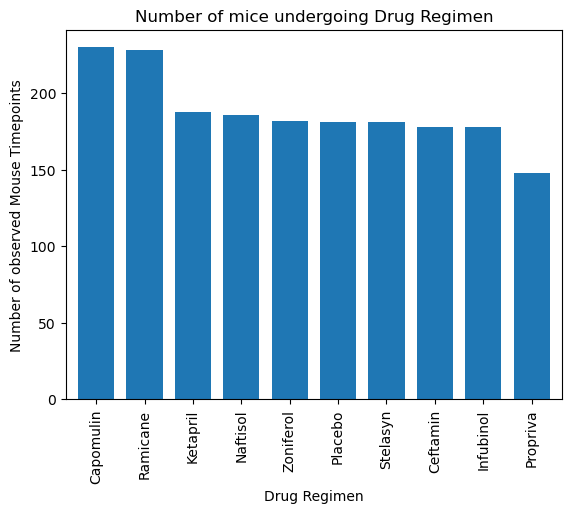

In [27]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
#create series by grouping drug regiment and counting rows.   
counts_drug_regimen = clean_df_mouse.groupby('Drug Regimen')['Mouse ID'].count()
#Sort values
counts_drug_regimen.sort_values(inplace=True, ascending=False)
#create plot
counts_drug_regimen.plot.bar(width=0.75)
#Add labels and title
plt.title('Number of mice undergoing Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of observed Mouse Timepoints')
#No limit setting necessary
#Show the plot
plt.show()

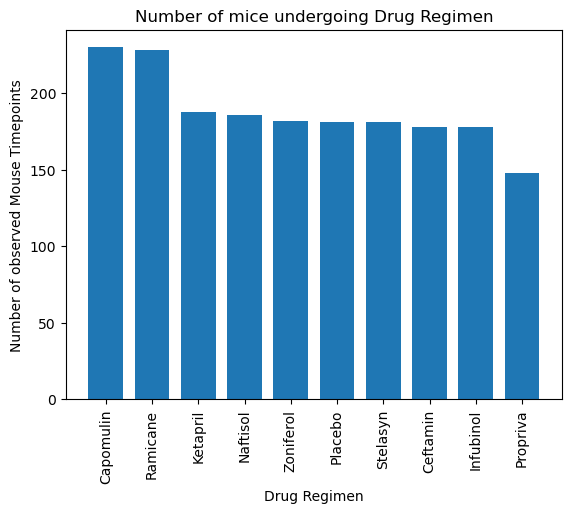

In [28]:
#get columns and values from counts_drug_regimen:
x_axis = counts_drug_regimen.index
y_axis = counts_drug_regimen.values
#Create basic plot, 
# default bars are fatter than above, setting width to make them look pretty close to the same
plt.bar(x_axis, y_axis, width=0.75)
#Add labels and title
plt.title('Number of mice undergoing Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of observed Mouse Timepoints')
#Adjust rotation of xticks
plt.xticks(rotation = 90)
#Show the plot
plt.show()

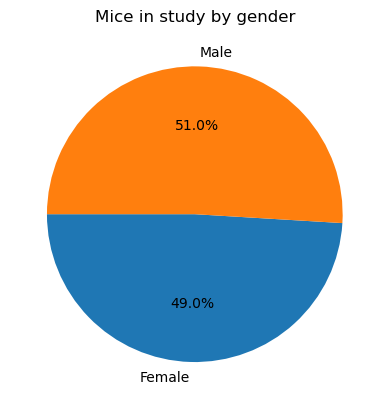

In [29]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_sex = clean_df_mouse.groupby('Sex')['Mouse ID'].count()
mice_sex.plot.pie(autopct='%1.1f%%', startangle=180, ylabel="", title = 'Mice in study by gender')
plt.show()

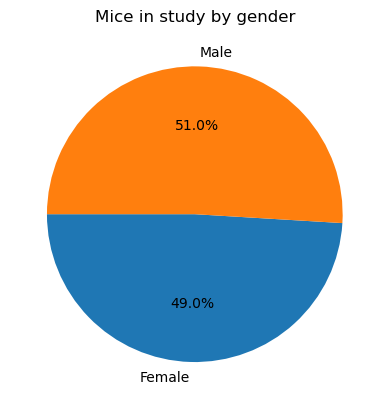

In [30]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(mice_sex, labels=['Female', 'Male'], autopct='%1.1f%%', startangle=180)
plt.title('Mice in study by gender')
plt.show()

## Quartiles, Outliers and Boxplots

In [41]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
clean_df_mouse_best = clean_df_mouse[clean_df_mouse["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]

# Start by getting the last (greatest) timepoint for each mouse
max_tumor = clean_df_mouse_best.groupby('Mouse ID')['Timepoint'].max()
max_tumor_df = pd.DataFrame(max_tumor)
max_tumor_df.reset_index(inplace=True)

In [42]:

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merge_max_tumor = pd.merge(max_tumor_df, clean_df_mouse, on=['Mouse ID', 'Timepoint'], how='left')

In [46]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = merge_max_tumor['Drug Regimen'].unique()

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
#start loop to iterate through treatments:
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    df_treatment = merge_max_tumor[merge_max_tumor['Drug Regimen'] == treatment]
    #Assign tumor volumes for this treatment to variable
    treatment_tumor_vol = df_treatment['Tumor Volume (mm3)']
    #Work out quartiles
    quartiles = treatment_tumor_vol.quantile([0.25,0.5,0.75])
    lower = quartiles[0.25]
    upper = quartiles[0.75]
    iqr = upper-lower
    lower_bound = lower - (1.5*iqr)
    upper_bound = upper + (1.5*iqr)
    # Determine outliers using upper and lower bounds
    outliers = treatment_tumor_vol.loc[(treatment_tumor_vol < lower_bound) | (treatment_tumor_vol > upper_bound)]
    #Append list to tumor_vol_data
    tumor_vol_data.append(list(treatment_tumor_vol))
    #Print statements for outliers or not. 
    if len(outliers) > 0:
        print(f"{treatment}'s potential outliers: {outliers}")
    else:
        print(f"No potential outliers for {treatment}")

Infubinol's potential outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
No potential outliers for Ceftamin
No potential outliers for Ramicane
No potential outliers for Capomulin


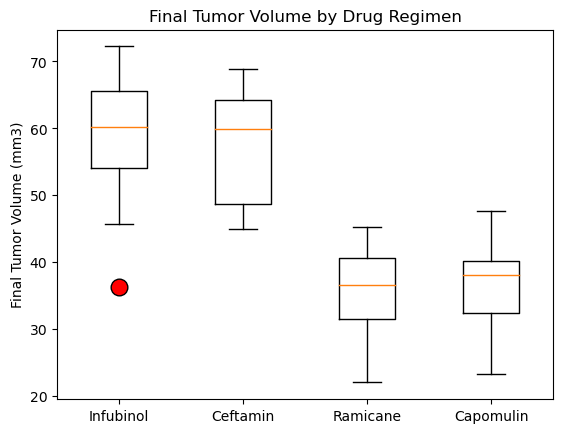

In [34]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol_data, labels = treatments, flierprops = dict(marker='o', markerfacecolor='red', markersize=12,
                  linestyle='none'))
plt.title("Final Tumor Volume by Drug Regimen")
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

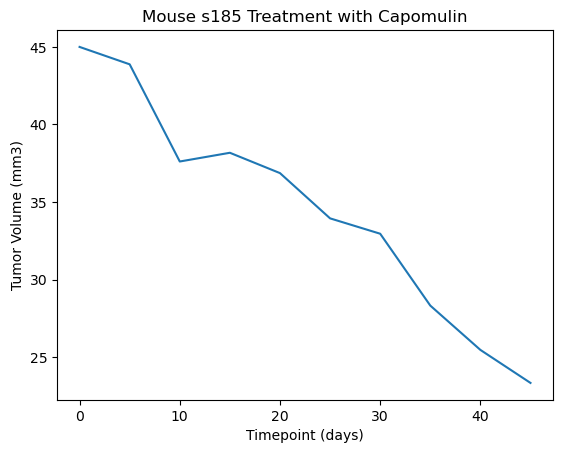

In [51]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
df_mouse_cap = clean_df_mouse[clean_df_mouse['Mouse ID'] == 's185']
df_mouse_cap.head()

df_mouse_cap.plot('Timepoint', 'Tumor Volume (mm3)', legend=None)
plt.title('Mouse s185 Treatment with Capomulin')
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Timepoint (days)')
plt.show()

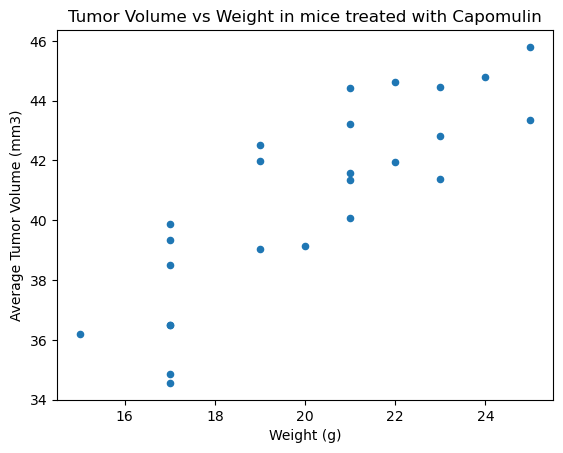

In [36]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
df_cap = clean_df_mouse[clean_df_mouse['Drug Regimen'] == 'Capomulin']
df_cap_group = df_cap.groupby('Mouse ID').agg({'Tumor Volume (mm3)': 'mean', 'Weight (g)': 'mean'})
df_cap_group.plot.scatter('Weight (g)', 'Tumor Volume (mm3)')
plt.title('Tumor Volume vs Weight in mice treated with Capomulin')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

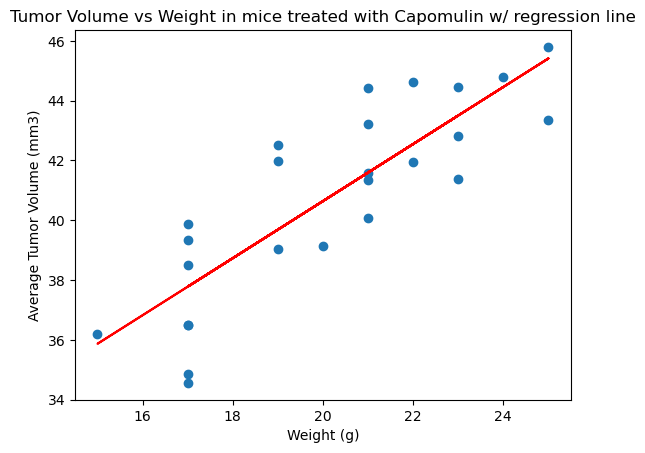

Correlation between Mouse Weight and Average Tumor Volume: 0.84


In [37]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

#set x and y values
x_values = df_cap_group['Weight (g)']
y_values = df_cap_group['Tumor Volume (mm3)']

#calculate regression statistics
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot the regression on the scatter plot. 
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Tumor Volume vs Weight in mice treated with Capomulin w/ regression line')
plt.show()

#Use Pearsons to calculate correlation
correlation = st.pearsonr(x_values, y_values)
print(f"Correlation between Mouse Weight and Average Tumor Volume: {round(correlation[0],2)}")

